# VAE Analysis - Faces dataset

## imports

In [1]:
import tensorflow as tf
tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)

2026-01-01 17:20:44.770658: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/cataluna84/Workspace-Antigravity/Generative_Deep_Learning/.venv/lib/python3.13/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.insert(0, "..")
from scipy.stats import norm
import pandas as pd

from src.models.VAE import VariationalAutoencoder
from src.utils.loaders import load_model, ImageLabelLoader

In [3]:
# run params
section = 'vae'
run_id = '0001'
data_name = 'faces'
RUN_FOLDER = '../run/{}/'.format(section)
RUN_FOLDER += '_'.join([run_id, data_name])


DATA_FOLDER = '../data/img_align_celeba/'
IMAGE_FOLDER = '../data/img_align_celeba/images/'

## data

In [4]:
INPUT_DIM = (128,128,3)

att = pd.read_csv(os.path.join(DATA_FOLDER, 'list_attr_celeba.csv'))

imageLoader = ImageLabelLoader(IMAGE_FOLDER, INPUT_DIM[:2])


In [5]:
att.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [6]:
att.shape

(202599, 41)

## architecture

In [7]:
vae = load_model(VariationalAutoencoder, RUN_FOLDER)

# print(vae.getModel().summary())

I0000 00:00:1767288054.261670   34597 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6094 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5


In [8]:
print(f'Type of vae: {type(vae)}')
print(f'Dir of vae: {dir(vae)}')
print(f"Does vae have 'decoder' attribute? {hasattr(vae, 'decoder')}")
if hasattr(vae, 'decoder'):
    print(f'Type of vae.decoder: {type(vae.decoder)}')
    print(f"Does vae.decoder have 'predict' method? {hasattr(vae.decoder, 'predict')}")


Type of vae: <class 'src.models.VAE.VariationalAutoencoder'>
Dir of vae: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__firstlineno__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__static_attributes__', '__str__', '__subclasshook__', '__weakref__', '_build', 'compile', 'decoder', 'decoder_conv_t_filters', 'decoder_conv_t_kernel_size', 'decoder_conv_t_strides', 'encoder', 'encoder_conv_filters', 'encoder_conv_kernel_size', 'encoder_conv_strides', 'encoder_mu_log_var', 'getModel', 'input_dim', 'load_weights', 'log_var', 'model', 'mu', 'n_layers_decoder', 'n_layers_encoder', 'name', 'plot_model', 'save', 'train', 'train_with_generator', 'use_batch_norm', 'use_dropout', 'z_dim']
Does vae have 'decoder' attribute? True
Type of vae.decoder: <class 'keras.src.models.f

## reconstructing faces

In [9]:
n_to_show = 10

data_flow_generic = imageLoader.build(att, n_to_show)



Found 202599 non-validated image filenames.


In [10]:
example_batch = next(data_flow_generic)
example_images = example_batch[0]

2026-01-01 17:20:57.652395: I external/local_xla/xla/service/service.cc:163] XLA service 0x7e5014003f40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-01 17:20:57.652476: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2070, Compute Capability 7.5
2026-01-01 17:20:57.675960: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-01-01 17:20:57.777275: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91701


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1767288060.506609   34721 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


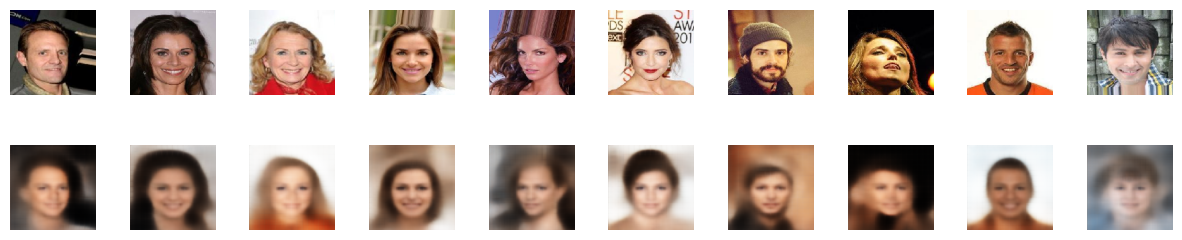

In [11]:
z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')        
    sub.imshow(img)

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img)


## Latent space distribution

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


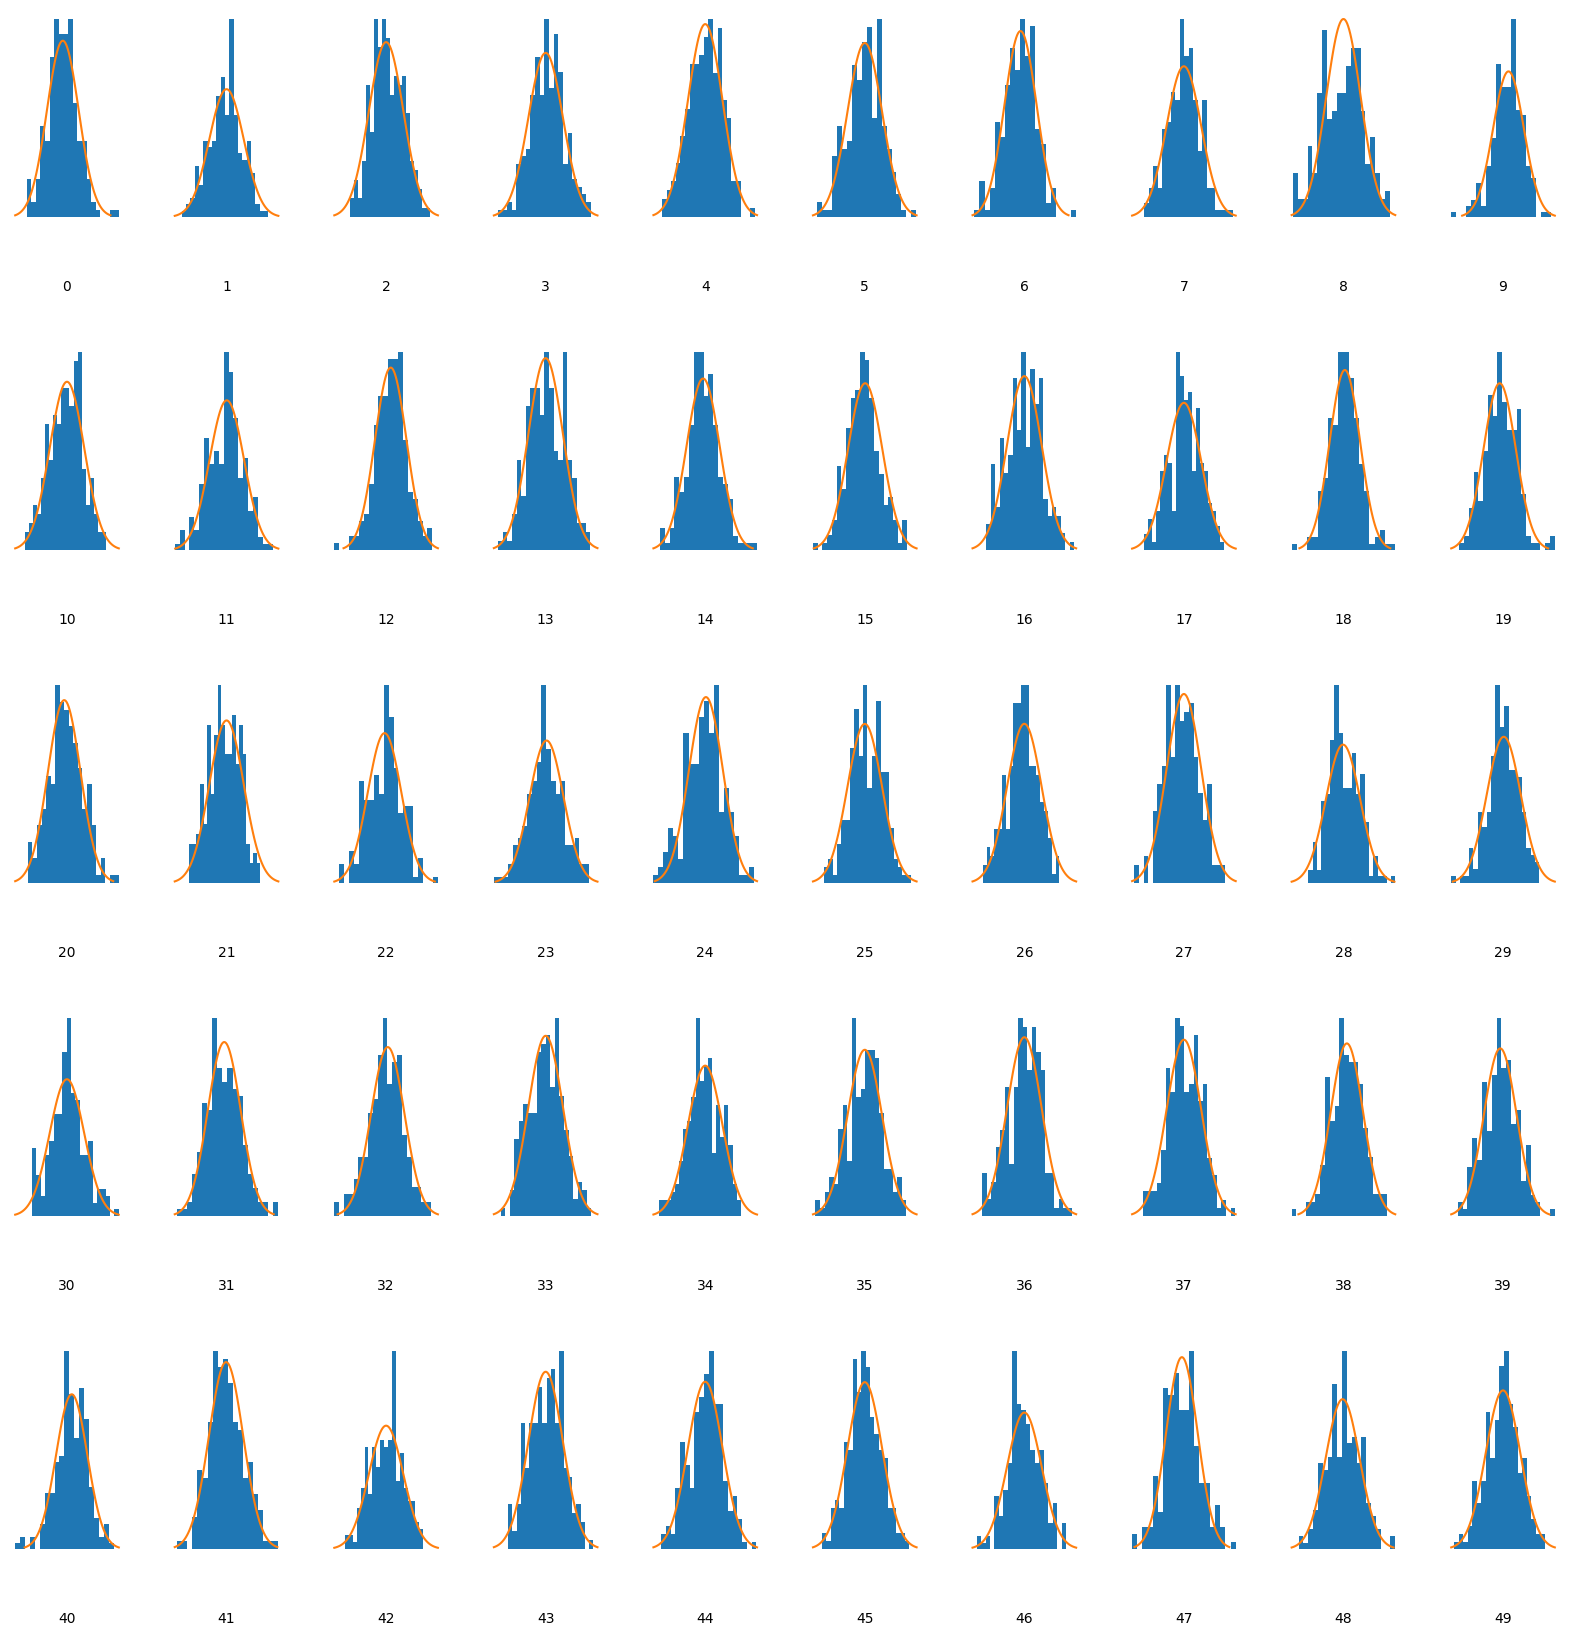

In [12]:
z_test = vae.encoder.predict(data_flow_generic, steps = 20, verbose = 1)

x = np.linspace(-3, 3, 100)

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.6, wspace=0.4)

for i in range(50):
    ax = fig.add_subplot(5, 10, i+1)
    ax.hist(z_test[:,i], density=True, bins = 20)
    ax.axis('off')
    ax.text(0.5, -0.35, str(i), fontsize=10, ha='center', transform=ax.transAxes)
    ax.plot(x,norm.pdf(x))

plt.show()

### Newly generated faces

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


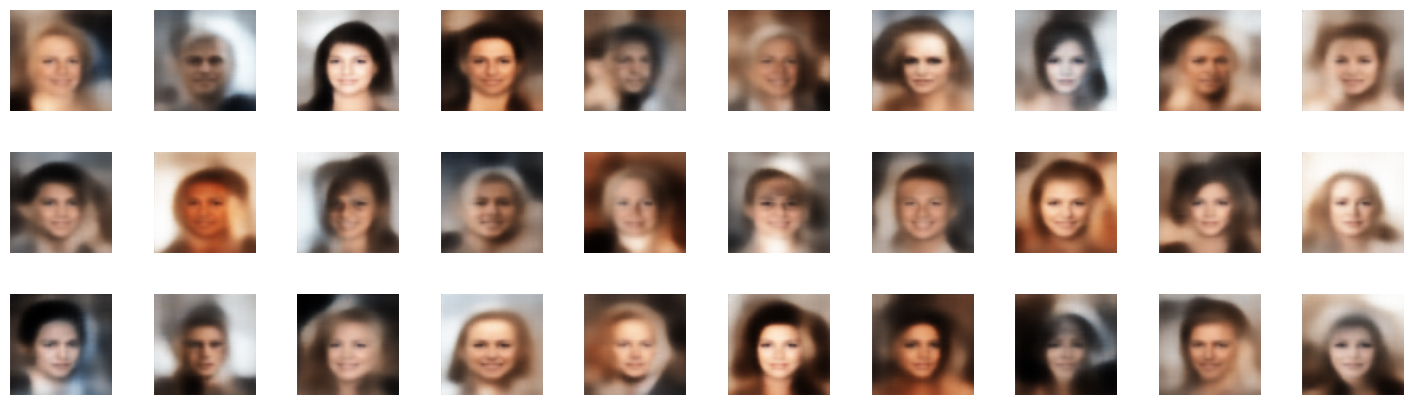

In [13]:
n_to_show = 30

znew = np.random.normal(size = (n_to_show,vae.z_dim))

reconst = vae.decoder.predict(np.array(znew))

fig = plt.figure(figsize=(18, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_to_show):
    ax = fig.add_subplot(3, 10, i+1)
    ax.imshow(reconst[i, :,:,:])
    ax.axis('off')

plt.show()

In [14]:
def get_vector_from_label(label, batch_size):

    data_flow_label = imageLoader.build(att, batch_size, label = label)

    origin = np.zeros(shape = vae.z_dim, dtype = 'float32')
    current_sum_POS = np.zeros(shape = vae.z_dim, dtype = 'float32')
    current_n_POS = 0
    current_mean_POS = np.zeros(shape = vae.z_dim, dtype = 'float32')

    current_sum_NEG = np.zeros(shape = vae.z_dim, dtype = 'float32')
    current_n_NEG = 0
    current_mean_NEG = np.zeros(shape = vae.z_dim, dtype = 'float32')

    current_vector = np.zeros(shape = vae.z_dim, dtype = 'float32')
    current_dist = 0

    print('label: ' + label)
    print('images : POS move : NEG move :distance : 𝛥 distance')
    while(current_n_POS < 10000):

        batch = next(data_flow_label)
        im = batch[0]
        attribute = batch[1]

        z = vae.encoder.predict(np.array(im))
        
#         %debug
        
        print('Attribute: ' + str(attribute.shape))
#         print(attribute)
        print('Zs predicted: ' + str(z.shape))
        
        z_POS = z[attribute==1]
        z_NEG = z[attribute==-1]

        if len(z_POS) > 0:
            current_sum_POS = current_sum_POS + np.sum(z_POS, axis = 0)
            current_n_POS += len(z_POS)
            new_mean_POS = current_sum_POS / current_n_POS
            movement_POS = np.linalg.norm(new_mean_POS-current_mean_POS)

        if len(z_NEG) > 0:
            current_sum_NEG = current_sum_NEG + np.sum(z_NEG, axis = 0)
            current_n_NEG += len(z_NEG)
            new_mean_NEG = current_sum_NEG / current_n_NEG
            movement_NEG = np.linalg.norm(new_mean_NEG-current_mean_NEG)

        current_vector = new_mean_POS-new_mean_NEG
        new_dist = np.linalg.norm(current_vector)
        dist_change = new_dist - current_dist


        print(str(current_n_POS)
              + '    : ' + str(np.round(movement_POS, 3))
              + '    : ' + str(np.round(movement_NEG, 3))
              + '    : ' + str(np.round(new_dist, 3))
              + '    : ' + str(np.round(dist_change, 3))
             )

        current_mean_POS = np.copy(new_mean_POS)
        current_mean_NEG = np.copy(new_mean_NEG)
        current_dist = np.copy(new_dist)

        if np.sum([movement_POS, movement_NEG]) < 0.08:
            current_vector = current_vector / current_dist
            print('Found the ' + label + ' vector')
            break

    return current_vector   


In [15]:
def add_vector_to_images(feature_vec):

    n_to_show = 5
    factors = [-4,-3,-2,-1,0,1,2,3,4]

    example_batch = next(data_flow_generic)
    example_images = example_batch[0]
    example_labels = example_batch[1]

    z_points = vae.encoder.predict(example_images)

    fig = plt.figure(figsize=(18, 10))

    counter = 1

    for i in range(n_to_show):

        img = example_images[i].squeeze()
        sub = fig.add_subplot(n_to_show, len(factors) + 1, counter)
        sub.axis('off')        
        sub.imshow(img)

        counter += 1

        for factor in factors:
            # From page number 121, we are performing the vector arithmetic in latent space, where factor represent
            # the alpha values and indicates how much of the feature vector is added or substracted:
            changed_z_point = z_points[i] + feature_vec * factor
            changed_image = vae.decoder.predict(np.array([changed_z_point]))[0]

            img = changed_image.squeeze()
            sub = fig.add_subplot(n_to_show, len(factors) + 1, counter)
            sub.axis('off')
            sub.imshow(img)

            counter += 1

    plt.show()


In [16]:
BATCH_SIZE = 500
attractive_vec = get_vector_from_label('Attractive', BATCH_SIZE)
mouth_open_vec = get_vector_from_label('Mouth_Slightly_Open', BATCH_SIZE)
smiling_vec = get_vector_from_label('Smiling', BATCH_SIZE)
lipstick_vec = get_vector_from_label('Wearing_Lipstick', BATCH_SIZE)
young_vec = get_vector_from_label('High_Cheekbones', BATCH_SIZE)
male_vec = get_vector_from_label('Male', BATCH_SIZE)

Found 202599 validated image filenames.
label: Attractive
images : POS move : NEG move :distance : 𝛥 distance
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step
Attribute: (500,)
Zs predicted: (500, 256)
268    : 1.133    : 1.128    : 1.7    : 1.7
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Attribute: (500,)
Zs predicted: (500, 256)
532    : 0.703    : 0.758    : 1.294    : -0.406
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Attribute: (500,)
Zs predicted: (500, 256)
769    : 0.397    : 0.461    : 1.125    : -0.169
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Attribute: (500,)
Zs predicted: (500, 256)
1026    : 0.279    : 0.302    : 1.088    : -0.037
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Attribute: (500,)
Zs predicted: (500, 256)
1278    : 0.207    : 0.225    : 1.067    : -0.022
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Attribute: (500,)
Zs predicted: (500, 256)
1532    : 0.171    : 0.172    : 1.045    : -0.021
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Attribute: (500,)
Zs predicted: (500, 256)
1784    : 0.155 

In [17]:
eyeglasses_vec = get_vector_from_label('Eyeglasses', BATCH_SIZE)

Found 202599 validated image filenames.
label: Eyeglasses
images : POS move : NEG move :distance : 𝛥 distance
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Attribute: (500,)
Zs predicted: (500, 256)
36    : 3.06    : 0.758    : 3.242    : 3.242
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Attribute: (500,)
Zs predicted: (500, 256)
65    : 1.831    : 0.51    : 2.634    : -0.609
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Attribute: (500,)
Zs predicted: (500, 256)
107    : 1.357    : 0.286    : 2.32    : -0.314
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Attribute: (500,)
Zs predicted: (500, 256)
135    : 0.718    : 0.21    : 2.202    : -0.118
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Attribute: (500,)
Zs predicted: (500, 256)
175    : 0.69    : 0.158    : 2.067    : -0.135
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Attribute: (500,)
Zs predicted: (500, 256)
207    : 0.461    : 0.142    : 2.002    : -0.064
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Attribute: (500,)
Zs predicted: (500, 256)
246    : 0.438    : 0.1

In [18]:
blonde_vec = get_vector_from_label('Blond_Hair', BATCH_SIZE)

Found 202599 validated image filenames.
label: Blond_Hair
images : POS move : NEG move :distance : 𝛥 distance
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Attribute: (500,)
Zs predicted: (500, 256)
79    : 2.14    : 0.821    : 2.451    : 2.451
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Attribute: (500,)
Zs predicted: (500, 256)
157    : 1.174    : 0.532    : 1.99    : -0.462
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Attribute: (500,)
Zs predicted: (500, 256)
218    : 0.591    : 0.352    : 1.859    : -0.13
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Attribute: (500,)
Zs predicted: (500, 256)
280    : 0.481    : 0.231    : 1.803    : -0.056
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Attribute: (500,)
Zs predicted: (500, 256)
346    : 0.387    : 0.183    : 1.805    : 0.002
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Attribute: (500,)
Zs predicted: (500, 256)
420    : 0.336    : 0.133    : 1.805    : -0.0
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Attribute: (500,)
Zs predicted: (500, 256)
494    : 0.268    : 0.1

Eyeglasses Vector
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━

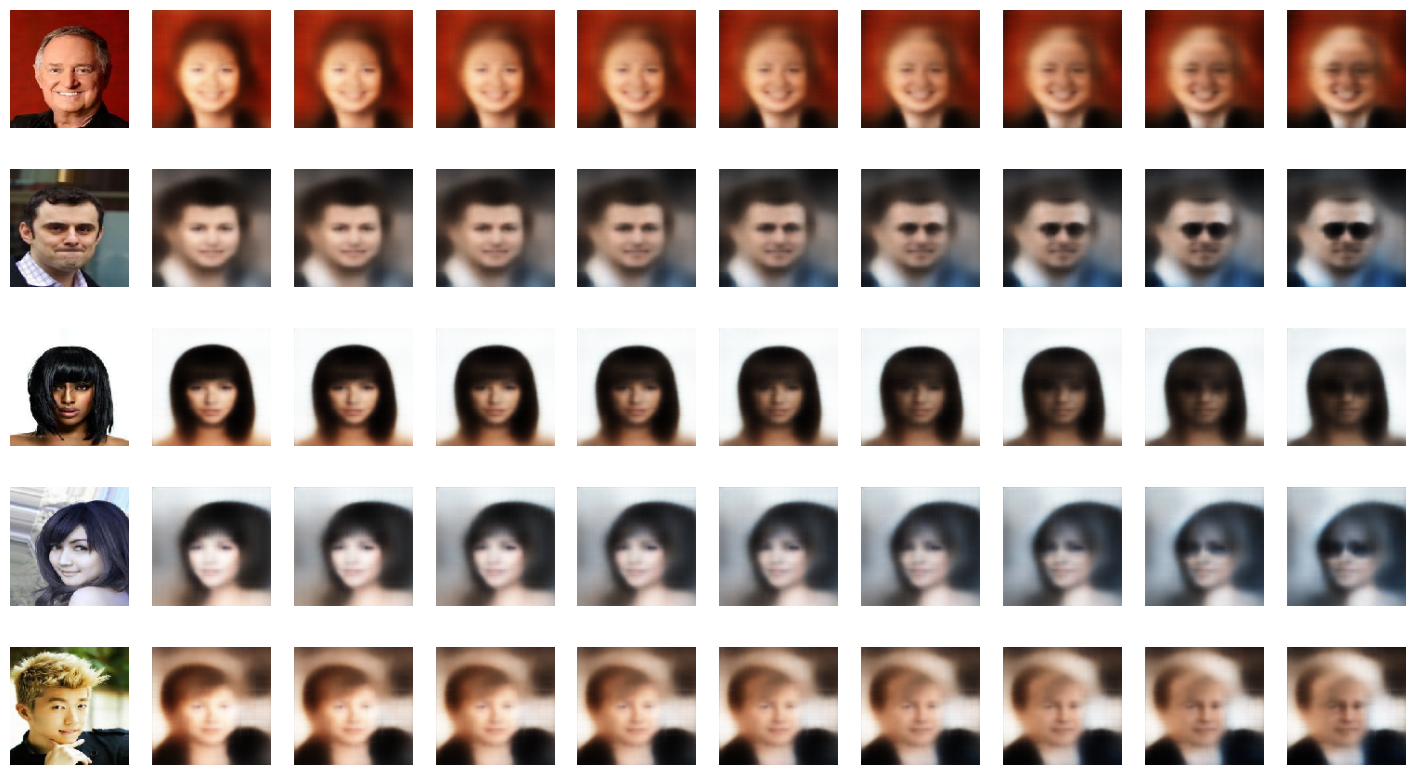

In [19]:
# print('Attractive Vector')
# add_vector_to_images(attractive_vec)

# print('Mouth Open Vector')
# add_vector_to_images(mouth_open_vec)

# print('Smiling Vector')
# add_vector_to_images(smiling_vec)

# print('Lipstick Vector')
# add_vector_to_images(lipstick_vec)

# print('Young Vector')
# add_vector_to_images(young_vec)

# print('Male Vector')
# add_vector_to_images(male_vec)

print('Eyeglasses Vector')
add_vector_to_images(eyeglasses_vec)

# print('Blond Vector')
# add_vector_to_images(blonde_vec)

In [20]:

def morph_faces(start_image_file, end_image_file):

    factors = np.arange(0,1,0.1)

    att_specific = att[att['image_id'].isin([start_image_file, end_image_file])]
    att_specific = att_specific.reset_index()
    data_flow_label = imageLoader.build(att_specific, 2)

    example_batch = next(data_flow_label)
    example_images = example_batch[0]
    example_labels = example_batch[1]

    z_points = vae.encoder.predict(example_images)


    fig = plt.figure(figsize=(18, 8))

    counter = 1

    img = example_images[0].squeeze()
    sub = fig.add_subplot(1, len(factors)+2, counter)
    sub.axis('off')        
    sub.imshow(img)

    counter+=1


    for factor in factors:

        changed_z_point = z_points[0] * (1-factor) + z_points[1]  * factor
        changed_image = vae.decoder.predict(np.array([changed_z_point]))[0]

        img = changed_image.squeeze()
        sub = fig.add_subplot(1, len(factors)+2, counter)
        sub.axis('off')
        sub.imshow(img)

        counter += 1

    img = example_images[1].squeeze()
    sub = fig.add_subplot(1, len(factors)+2, counter)
    sub.axis('off')        
    sub.imshow(img)


    plt.show()

Found 2 non-validated image filenames.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


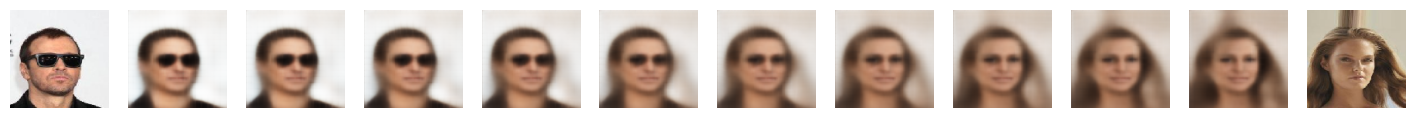

In [21]:
start_image_file = '000238.jpg' 
end_image_file = '000193.jpg' #glasses

morph_faces(start_image_file, end_image_file)

Found 2 non-validated image filenames.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


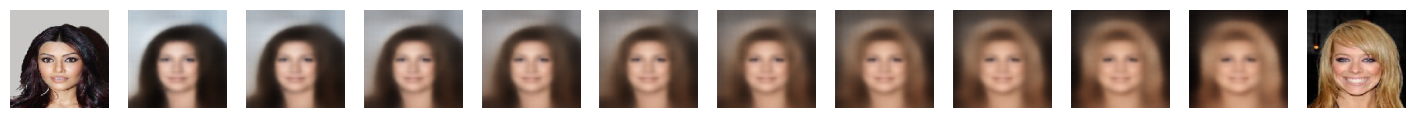

In [22]:
start_image_file = '000112.jpg'
end_image_file = '000258.jpg'

morph_faces(start_image_file, end_image_file)

Found 2 non-validated image filenames.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


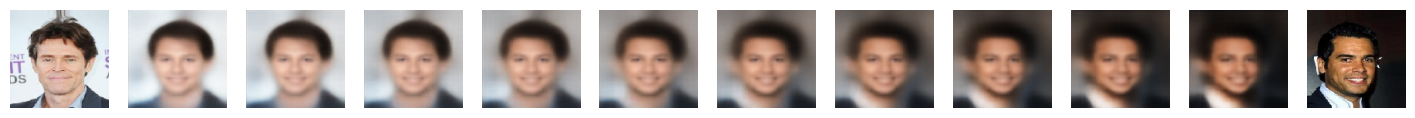

In [23]:
start_image_file = '000230.jpg'
end_image_file = '000712.jpg'

morph_faces(start_image_file, end_image_file)

# Cleanup: Restart Kernel to Release GPU Memory

In [ ]:
# ═══════════════════════════════════════════════════════════════════════════════
# CLEANUP: Restart kernel to fully release GPU memory
# ═══════════════════════════════════════════════════════════════════════════════
# TensorFlow/CUDA does not release GPU memory within a running Python process.
# Restarting the kernel is the only guaranteed way to free all GPU resources.
# Run this cell only after all work is complete and saved.

import IPython
print("Restarting kernel to release GPU memory...")
IPython.Application.instance().kernel.do_shutdown(restart=True)